### Import libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import cv2
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

### Show data images

In [2]:
traindir = "data/Training"
validdir = "data/Validation"
os.listdir(traindir)

['female', 'male']

In [3]:
def show_image(dir):
    plt.figure(figsize=(12,7))
    for i in range(10):
        plt.subplot(2,5,i+1)
        img = random.choice(os.listdir(dir))
        img = load_img(os.path.join(dir,img))
        plt.subplots_adjust(hspace=0.2)
        x =dir.split("/")[-1]
        if x == "male":
            plt.suptitle("Male Images",fontsize=15)
        else:
            plt.suptitle("Female Images",fontsize=15)
        plt.imshow(img)
    plt.tight_layout()

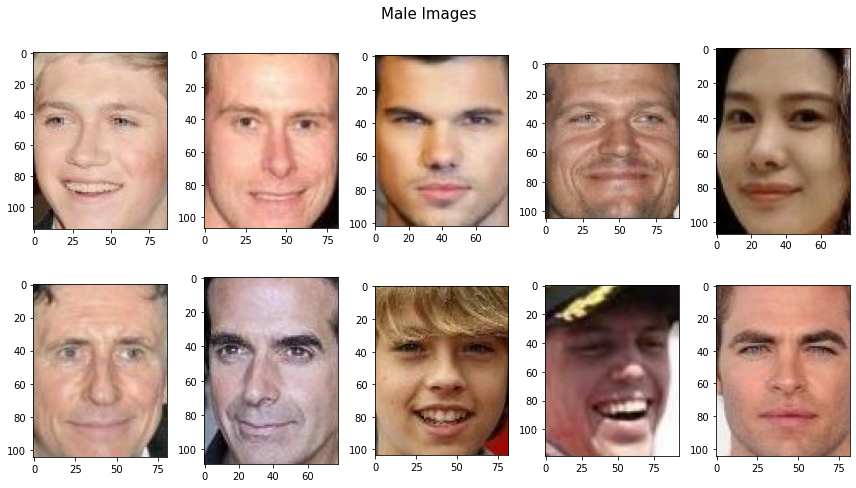

In [4]:
show_image("data/Training/male")

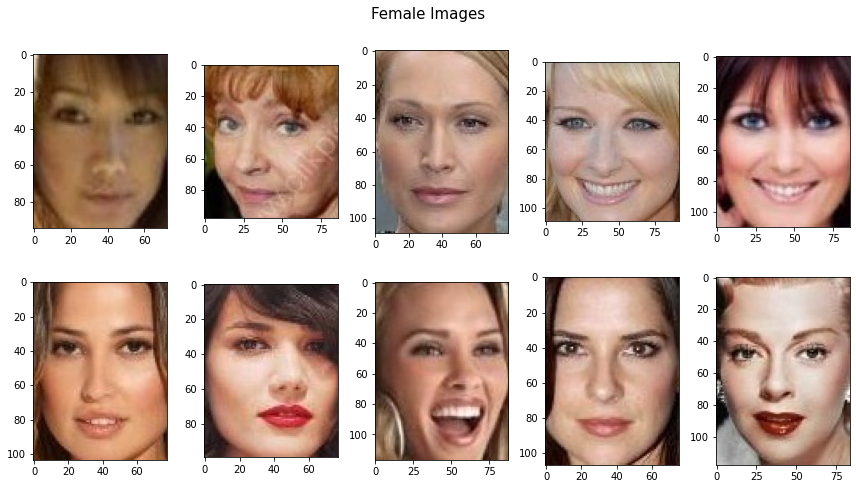

In [5]:
show_image("data/Training/female")

### Split data to train and val set

In [13]:
height = 150
width = 150

train_datagen =  ImageDataGenerator(rescale = 1/255.0,rotation_range=45,height_shift_range=0.2,shear_range=0.2,
                                    zoom_range=0.2,validation_split=0.2,horizontal_flip=True)

train_data = train_datagen.flow_from_directory(directory = traindir,target_size=(height,width),
                                               class_mode = "categorical",batch_size=32,subset="training")

val_datagen = ImageDataGenerator(rescale = 1/255.0)

val_data = train_datagen.flow_from_directory(directory = traindir,target_size=(height,width),
                                             class_mode = "categorical",batch_size=32,subset="validation")

Found 37608 images belonging to 2 classes.
Found 9401 images belonging to 2 classes.


In [14]:
print('Size of training set:   ', len(train_data))
print('Size of validation set: ',len(val_data))

Size of training set:    1176
Size of validation set:  294


### Create Model

In [15]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(height,width,3))

In [16]:
for layer in mobilenet.layers:
    layer.trainable = False

In [25]:
model = Sequential()
model.add(mobilenet)

model.add(Dense(256, kernel_initializer='he_normal'))
model.add(Activation('relu'))

model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(2,activation = "softmax"))

model.compile(optimizer=Adam(lr=0.001),loss = "categorical_crossentropy",metrics =["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 5, 5, 256)         327936    
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 256)         0         
_________________________________________________________________
dense_5 (Dense)              (None, 5, 5, 128)         32896     
_________________________________________________________________
activation_3 (Activation)    (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

In [26]:
batch_size = 32
history = model.fit(train_data,steps_per_epoch = len(train_data)// batch_size,epochs=15,
                    validation_data = val_data,validation_steps = len(val_data)//batch_size,verbose = 1)

Epoch 1/15
36/36 [==============================] - 22s 533ms/step - loss: 1.2362 - accuracy: 0.6259 - val_loss: 0.5804 - val_accuracy: 0.6667
Epoch 2/15
36/36 [==============================] - 19s 535ms/step - loss: 0.4879 - accuracy: 0.7734 - val_loss: 0.4372 - val_accuracy: 0.8090
Epoch 3/15
36/36 [==============================] - 20s 543ms/step - loss: 0.4254 - accuracy: 0.8003 - val_loss: 0.3583 - val_accuracy: 0.8403
Epoch 4/15
36/36 [==============================] - 20s 555ms/step - loss: 0.4028 - accuracy: 0.8220 - val_loss: 0.3604 - val_accuracy: 0.8299
Epoch 5/15
36/36 [==============================] - 21s 569ms/step - loss: 0.4181 - accuracy: 0.8099 - val_loss: 0.3574 - val_accuracy: 0.8264
Epoch 6/15
36/36 [==============================] - 20s 544ms/step - loss: 0.4133 - accuracy: 0.8290 - val_loss: 0.3883 - val_accuracy: 0.8438
Epoch 7/15
36/36 [==============================] - 20s 549ms/step - loss: 0.3740 - accuracy: 0.8368 - val_loss: 0.3335 - val_accuracy: 0.8715

In [27]:
model.evaluate_generator(val_data)

[0.3053297698497772, 0.8690564632415771]

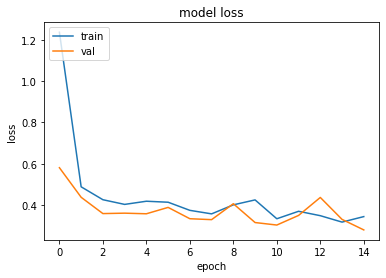

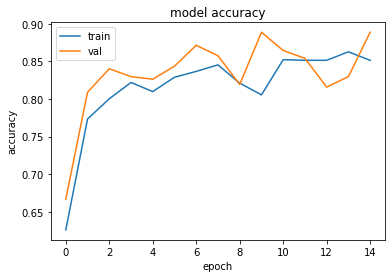

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()